# CASE - ANÁLISE TELEMARKETING

## Contexto

Os depósitos a prazo são uma importante fonte de receita para um banco. Um depósito a prazo é um investimento em dinheiro mantido em uma instituição financeira. Seu dinheiro é investido por uma taxa de juros acordada por um período fixo de tempo ou prazo. O banco tem vários planos de divulgação para vender depósitos a prazo para seus clientes como marketing por e-mail, anúncios, marketing telefônico e marketing digital. As campanhas de marketing telefônico ainda são uma das formas mais eficazes de chegar às pessoas. No entanto, eles exigem um grande investimento, uma vez que grandes call centers são contratados para realmente executar essas campanhas. Portanto, é crucial identificar com antecedência os clientes com maior probabilidade de conversão, para que possam ser visados especificamente por meio de uma ligação.

## Objetivos

Entender como as informações disponíveis dos clientes podem ajudar a descobrirmos/prevermos os clientes com maior probabilidade de conversão (ou seja, de fazer um depósito a prazo), para que possam ser especificamente contatados por meio de uma ligação e para que não seja gasto mais dinheiro que o necessário.

Utilizar os métodos de análise de dados e os modelos de machine learning para conseguir selecionar as variáveis, tratar os
dados e prever quais clientes têm a maior probabilidade de conversão.


## Importação dos dados 

In [3]:
# Importar a biblioteca pandas
import pandas as pd 
# Fazer a leitura dos arquivos csv e salvar dentro de uma variável
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# Ver o número de observações em cada arquivo
print('O número de observações do dataset Train é: ', len(df_train))
print('O número de observações do dataset Test é: ', len(df_test))

O número de observações do dataset Train é:  45211
O número de observações do dataset Test é:  4521


## Exploração dos dados 

In [4]:
df_train.shape 

(45211, 15)

O dataframe " train " tem 45211 linhas e 15 colunas

In [5]:
df_test.shape 

(4521, 15)

O dataframe " test " tem 4521 linhas e 15 colunas

In [6]:
#lista das colunas do df_train
df_train.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [7]:
#lista das colunas do df_test
df_test.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

**O que significa cada coluna?**

* **age:** Age of the client / Idade do cliente
* **job:** Type of job / Tipo de trabalho
* **marital:** Marital Status of the client / Estado civil do cliente
* **education:** Education Level / Nível de educação
* **default:** Credit in default / Crédito em inadimplência
* **balance:** Average yearly balance, in euros / Saldo médio anual, em euros
* **housing:** If the person has taken a Housing Loan / Se a pessoa fez um Empréstimo para Habitação
* **loan:** If the person has taken a Personal Loan / Se a pessoa fez um empréstimo pessoal
* **contact:** Contact communication type / Tipo de comunicação para contato
* **duration:** Contact Duration / Duração do contato
* **campaign:** number of contacts performed during this campaign to the client / número de contatos realizados durante esta campanha para o cliente
* **pdays:** number of days that passed by after the client was last contacted / número de dias que se passaram depois que o cliente foi contatado pela última vez
* **previous:** number of contacts performed before this campaign / número de contatos realizados antes desta campanha
* **poutcome:** outcome of the previous marketing campaign / resultado da campanha de marketing anterior
* **y:** has the client subscribed a term deposit? / o cliente subscreveu um depósito a prazo?

Portanto, 'y' é a nossa variável target. Agora, vamos checar os tipos de dados das variáveis de cada dataset.

In [8]:
# Info sobre as variáveis do df_train
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [9]:
# Info sobre as variáveis do df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   duration   4521 non-null   int64 
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
 14  y          4521 non-null   object
dtypes: int64(6), object(9)
memory usage: 529.9+ KB


Os dois dataframe têm o mesmo tipo de dados e pode-se notar que não existe dados nulos. Além disso, tem-se variáveis numéricas e categoricas.

In [10]:
#Vendo as 5 primeiras linhas do dataframe train
df_train.head() 

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


In [11]:
#vendo as 5 primeiras linhas do dataframe test
df_test.head() 

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [12]:
# Conferindo a existência de dados nulos no df_train
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
# Conferindo a existência de dados nulos no df_test
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
# Obtenção dos atributos de cada coluna do dataframe.
for a in list(df_train.columns):
    
    # Lista de valores únicos
    n = df_train[a].unique()
    
    # Se o número de valores únicos for < 30, print a coluna e os atributos. senão print o número de valores únicos
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 77 unique values
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance: 7168 unique values
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
duration: 1573 unique values
campaign: 48 unique values
pdays: 559 unique values
previous: 41 unique values
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


**Observações:**

- Tem-se 9 variáveis categoricas (job, marital, education, contact, poutcome, y, loan, default, housing) e 6 numéricas (age, duration, campaign, pdays, previous, balance).

- Tem-se 4 variáveis binárias no dataset: default, housing, loan, y.


## Análise exploratória inicial

In [15]:
# Contando o número de pessoas que subscreveu ou não
df_train.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

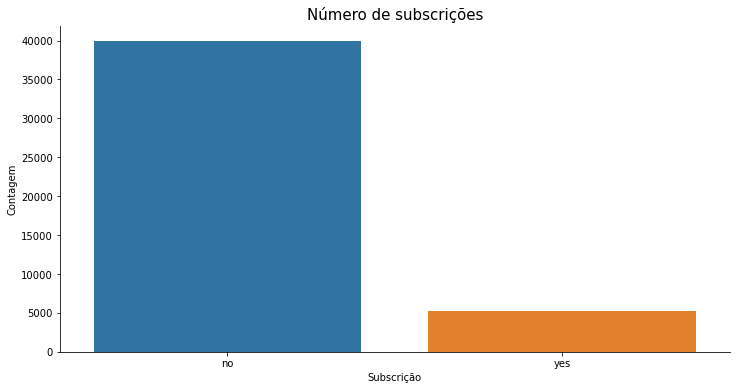

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.countplot(data=df_train, x='y')
ax.set_xlabel('Subscrição', fontsize=10)
ax.set_ylabel('Contagem', fontsize=10)
ax.set_title('Número de subscrições', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

In [17]:
# Vendo em porcentagem
df_train['y'].value_counts(normalize = True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

Analisando o resultado acima, percebe-se que só cerca de 12% do total subscreveram ao depósito a prazo.

Pode-se observar também que temos no nosso dataset muito mais informações de pessoas que não subscreveram ao depósito a prazo. Esse desequilíbrio deve ser tratado antes da criação do modelo caso contrário o modelo será tendencioso.

In [18]:
# Vamos dar uma olhada nas estatistícas relacionadas à variável 'job' 
df_train['job'].value_counts(normalize = True).round(2)

blue-collar      0.22
management       0.21
technician       0.17
admin.           0.11
services         0.09
retired          0.05
self-employed    0.03
entrepreneur     0.03
unemployed       0.03
housemaid        0.03
student          0.02
unknown          0.01
Name: job, dtype: float64

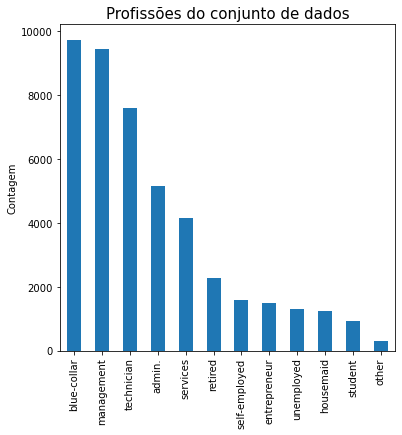

In [123]:
# Plotando o gráfico dos tipos de profissão para melhor visualização
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
df_train['job'].value_counts().plot(kind = 'bar')
ax.set_ylabel('Contagem', fontsize=10)
ax.set_title('Profissões do conjunto de dados', fontsize=15)
ax.tick_params(labelsize=10)

In [20]:
# Situação da subscrição por profissão
job_y = pd.crosstab(df_train['job'],df_train['y'])
job_y_norm = job_y.div(job_y.sum(1).astype(float), axis=0)
# Porcentagens da relação subscrição-profissão
job_y_norm.round(2)

y,no,yes
job,,
admin.,0.88,0.12
blue-collar,0.93,0.07
entrepreneur,0.92,0.08
housemaid,0.91,0.09
management,0.86,0.14
retired,0.77,0.23
self-employed,0.88,0.12
services,0.91,0.09
student,0.71,0.29


<AxesSubplot:xlabel='job'>

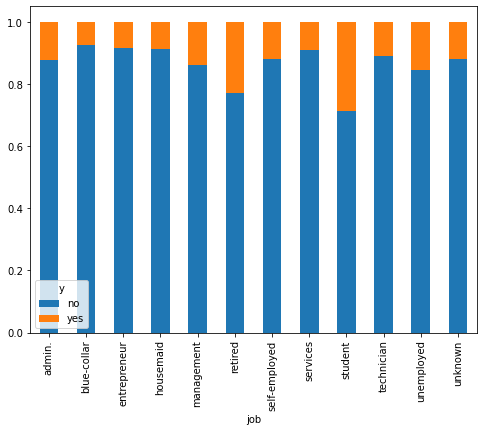

In [127]:
# Gráfico da relação subscrição-profissão
job_y_norm.plot.bar(stacked=True,figsize=(8,6))

Percebe-se que os estudantes e os aposentados são as pessoas que mais subscreveram ao depósito a prazo em termos de proporção. Assim, estes são mais propensos a fazer um depósito a prazo.

In [22]:
# Estado civil das pessoas
df_train['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

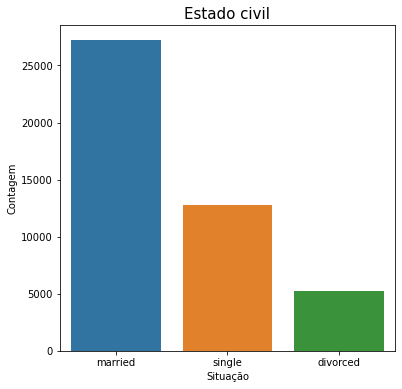

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.countplot(data=df_train, x='marital')
ax.set_ylabel('Contagem', fontsize=10)
ax.set_xlabel('Situação', fontsize=10)
ax.set_title('Estado civil', fontsize=15)
ax.tick_params(labelsize=10)

Text(0.5, 1.0, 'Estado civil vs Subscrições')

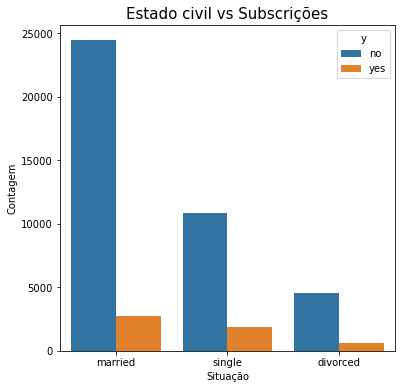

In [131]:
# Situação da subscrição por estado civil
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.countplot(data=df_train, x='marital', hue='y')
ax.set_ylabel('Contagem', fontsize=10)
ax.set_xlabel('Situação', fontsize=10)
ax.set_title('Estado civil vs Subscrições', fontsize=15)

In [25]:
pd.crosstab(df_train['marital'], df_train['y'])

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [26]:
marital = pd.crosstab(df_train['marital'], df_train['y'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm.round(2)

y,no,yes
marital,,
divorced,0.88,0.12
married,0.90,0.10
single,0.85,0.15


Diante desse resultado, pode-se afirmar que o estado civil não tem influência no depósito a prazo.

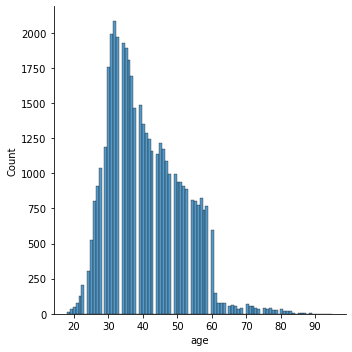

In [27]:
# Analisando as faixas etárias
sns.displot(df_train['age'])

A maior parte dos clientes estão na faixa de idade de 25-60.

In [28]:
# Vamos ver a influência da inadimplência na subscrição ao depósito a prazo.
pd.crosstab(df_train['default'], df_train['y'])

y,no,yes
default,,
no,39159,5237
yes,763,52


Text(0.5, 1.0, 'Crédito em inadimplência')

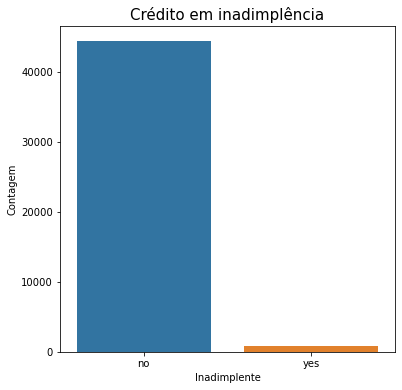

In [137]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.countplot(data = df_train, x = 'default')
ax.set_ylabel('Contagem', fontsize=10)
ax.set_xlabel('Inadimplente', fontsize=10)
ax.set_title('Crédito em inadimplência', fontsize=15)

In [135]:
dflt_y = pd.crosstab(df_train['default'], df_train['y'], rownames=['Inadimplencia'], colnames=['Subscrição'], margins=True)
dflt_y_norm = dflt_y.div(dflt_y.sum(1).astype(float), axis=0)
dflt_y_norm.round(2)

Subscrição,no,yes,All
Inadimplencia,,,
no,0.44,0.06,0.5
yes,0.47,0.03,0.5
All,0.44,0.06,0.5


<AxesSubplot:xlabel='default'>

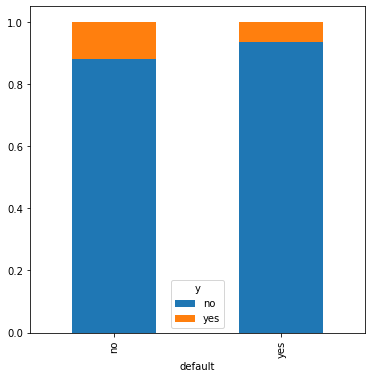

In [30]:
dflt_y_norm.plot.bar(stacked=True, figsize=(6,6))

Podemos dizer que os clientes sem inadimplência têm mais chances de contratar um depósito a prazo em comparação aos clientes que possuem histórico de inadimplência.

<AxesSubplot:xlabel='education', ylabel='count'>

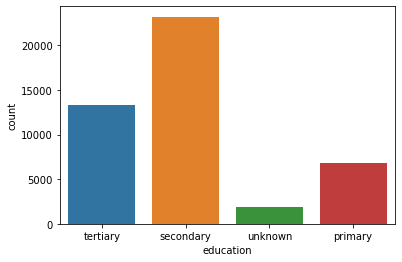

In [31]:
# Vamos explorar a variável 'education'
sns.countplot(data=df_train, x='education')

<AxesSubplot:xlabel='education', ylabel='count'>

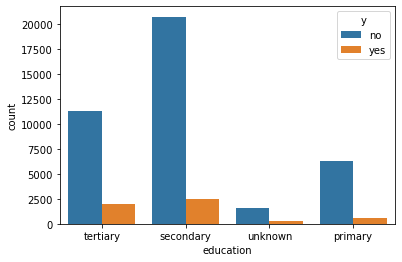

In [32]:
sns.countplot(data=df_train, x='education', hue='y')

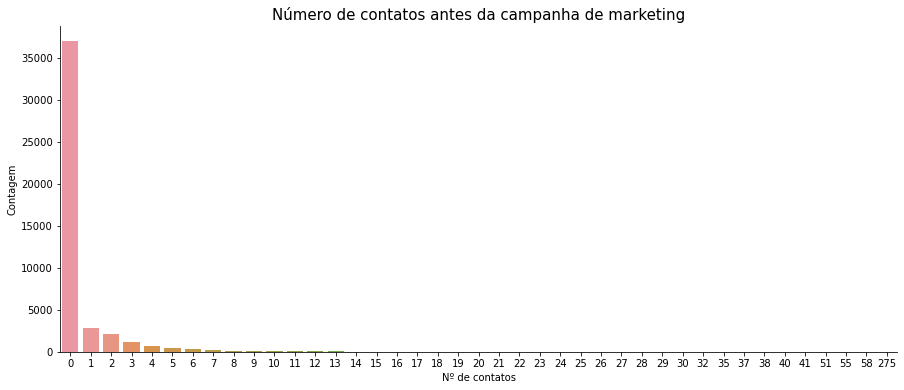

In [108]:
# Vamos explorar a variável 'previous' (números de contatos antes da campanha de marketing)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.countplot(x = 'previous', data = df_train)
ax.set_xlabel('Nº de contatos', fontsize=10)
ax.set_ylabel('Contagem', fontsize=10)
ax.set_title('Número de contatos antes da campanha de marketing', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

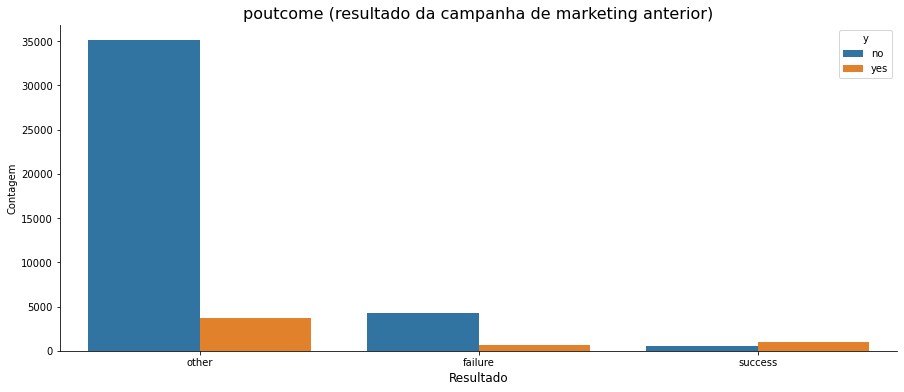

In [106]:
# Vamos explorar a variável 'poutcome' (resultado da campanha de marketing anterior).
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.countplot(x = 'poutcome', data = df_train, hue='y')
ax.set_xlabel('Resultado', fontsize=12)
ax.set_ylabel('Contagem', fontsize=10)
ax.set_title('poutcome (resultado da campanha de marketing anterior)', fontsize=16)
ax.tick_params(labelsize=10)
sns.despine()

<AxesSubplot:xlabel='campaign', ylabel='count'>

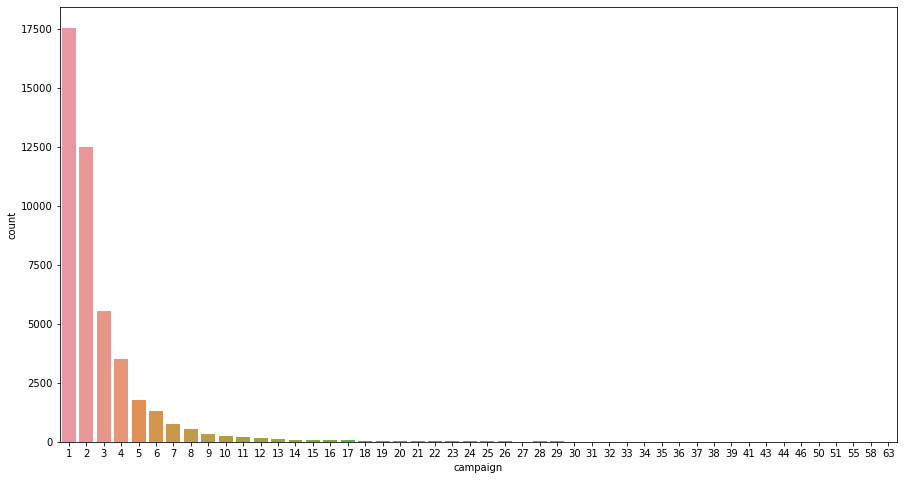

In [110]:
# Vamos explorar a variável 'campaign' (número de contatos realizados durante a campanha aos clientes)
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(data=df_train, x='campaign')

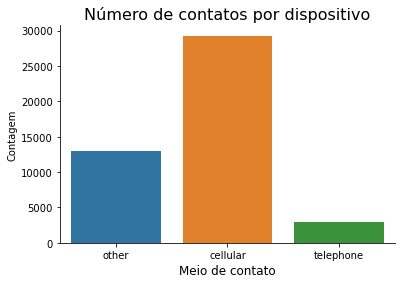

In [112]:
# Meio de contato predominante
fig, ax = plt.subplots()
sns.countplot(data=df_train, x='contact')
ax.set_xlabel('Meio de contato', fontsize=12)
ax.set_ylabel('Contagem', fontsize=10)
ax.set_title ('Número de contatos por dispositivo', fontsize=16)
ax.tick_params(labelsize=10)
sns.despine()

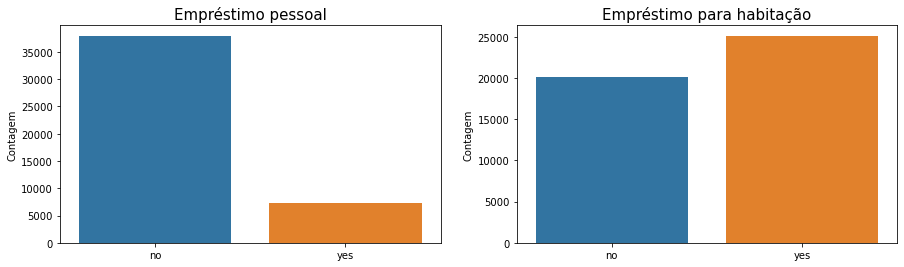

In [138]:
# Analisando os empréstimos
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))
sns.countplot(x = 'loan', data = df_train, ax = ax1, order = ['no', 'yes'])
ax1.set_title('Empréstimo pessoal', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Contagem', fontsize=10)
ax1.tick_params(labelsize=10)

sns.countplot(x = 'housing', data = df_train, ax = ax2, order = ['no', 'yes'])
ax2.set_title('Empréstimo para habitação', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Contagem', fontsize=10)
ax2.tick_params(labelsize=10)


## Limpeza e Transformação dos dados 

**Não há valor ausente neste dataset, porém existem valores como "unknown" e "outros" que devem ser tratados. Além disso, os outliers devem ser removidos do conjunto de dados. Outliers são definidos como os valores que estão a mais de três desvios padrão da média.**

In [38]:
# Substituindo 'unknown' por 'other' no df_train
df_train[['poutcome','job', 'education', 'contact']] = df_train[['poutcome','job','education','contact']].replace(['unknown'],'other')

In [39]:
# Substituindo 'unknown' por 'other' no df_test
df_test[['poutcome','job', 'education','contact']] = df_test[['poutcome','job','education','contact']].replace(['unknown'],'other')

In [40]:
# Obtendo os dados estatistícos da variável'balance'
df_train[['balance']].describe().round()

,balance
count,45211.0
mean,1362.0
std,3045.0
min,-8019.0
25%,72.0
50%,448.0
75%,1428.0
max,102127.0


Os valores discrepantes na coluna 'balance' precisam ser descartados. 

In [41]:
from scipy.stats import zscore
# Criando uma nova tabela e calculando o zscore nela.
df_train['balance_outliers'] = df_train['balance']
df_train['balance_outliers']= zscore(df_train['balance_outliers'])
# Criando uma variável para filtrar os outliers
cond_outliers = (df_train['balance_outliers']>3) | (df_train['balance_outliers']<-3 )
# Aplicando o filtro e removendo os outliers
train_dataset = df_train.drop(df_train[cond_outliers].index, axis = 0, inplace = False)

In [42]:
train_dataset.shape

(44466, 16)

In [43]:
train_dataset2 = train_dataset.drop('balance_outliers', axis=1)

In [44]:
train_dataset2.shape

(44466, 15)

In [45]:
# Criando uma nova tabela com as respostas da subscrição em formato numérico (No = 0, Yes = 1)
def convert(dataset, new_column, old_column):
    dataset[new_column] = dataset[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset[new_column].value_counts()

convert(train_dataset2, "resposta_subscricao", "y")

0    39298
1     5168
Name: resposta_subscricao, dtype: int64

In [46]:
train_dataset3 = train_dataset2.drop('y', axis=1)

In [47]:
# Mudando a unidade de 'duration' de segundos para minutos
train_dataset3['duration'] = train_dataset3['duration'].apply(lambda n:n/60).round(2)

In [48]:
train_dataset2['duration'] = train_dataset2['duration'].apply(lambda n:n/60).round(2)

In [49]:
train_dataset2.rename(index=str, columns={'y': 'resposta'}, inplace = True)

## Insights

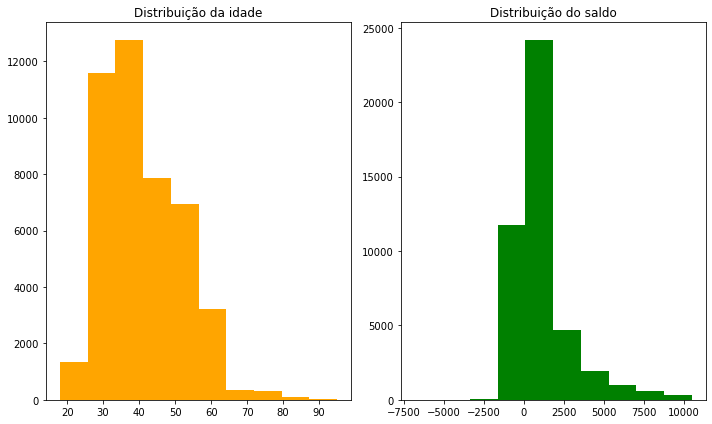

In [50]:
dist_age_balance = plt.figure(figsize = (10,6))

graf1 = dist_age_balance.add_subplot(1,2,1) 
graf2 = dist_age_balance.add_subplot(1,2,2)

graf1.hist(train_dataset3['age'], color = 'orange')
graf1.set_title('Distribuição da idade')

graf2.hist(train_dataset3['balance'], color = 'green')
graf2.set_title('Distribuição do saldo')

plt.tight_layout() 
plt.show()

In [51]:
train_dataset3.balance.describe()

count    44466.000000
mean      1084.544483
std       1721.069271
min      -6847.000000
25%         68.000000
50%        431.000000
75%       1347.000000
max      10483.000000
Name: balance, dtype: float64

- Os clientes chamados pelo banco possuem uma faixa etária extensa, de 18 a 95 anos. No entanto, a maioria dos clientes chamados tem entre 30 e 40 anos. 

- Após a eliminação dos outliers do saldo, o intervalo ainda é enorme, de um mínimo de -6847 a um máximo de 10443 euros. A distribuição do saldo tem um grande desvio padrão em relação à média, sugerindo grandes variabilidades nos níveis de saldo dos clientes.

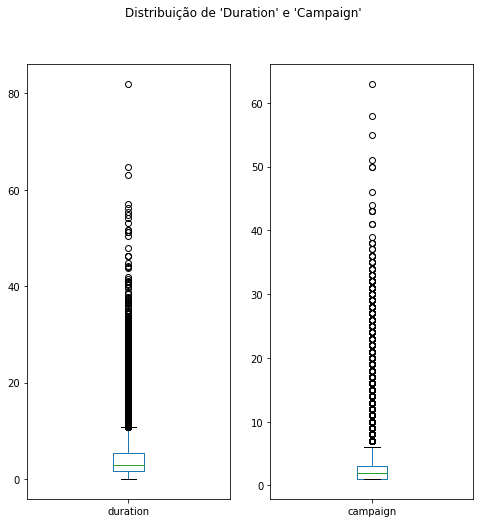

In [52]:
dist_dur_cam = train_dataset3[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title="Distribuição de 'Duration' e 'Campaign'")
plt.show()

In [53]:
train_dataset3.duration.describe().round(2)

count    44466.00
mean         4.30
std          4.29
min          0.00
25%          1.72
50%          3.00
75%          5.32
max         81.97
Name: duration, dtype: float64

In [54]:
train_dataset3.campaign.describe().round(2)

count    44466.00
mean         2.77
std          3.10
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         63.00
Name: campaign, dtype: float64

- Conforme observado no box plot, a duração do contato tem uma mediana de 3 minutos, com intervalo interquartil de 1,8 minutos a 5,4 minutos. O boxplot inclinado para a esquerda indica que a maioria das chamadas são relativamente curtas. Além disso, há um grande número de outliers que variam de 10 a 40 minutos, que valem um estudo mais aprofundado.

- Cerca de metade dos clientes foram contactados pelo banco uma segunda vez, enquanto 25% foi apresentado ao depósito a prazo. A maioria dos clientes foi contatada pelo banco de uma a três vezes, o que é razoável. No entanto, alguns clientes foram contatados por até 58 vezes, o que não é normal. Esses clientes podem ter algumas necessidades especiais que requerem contato frequente.

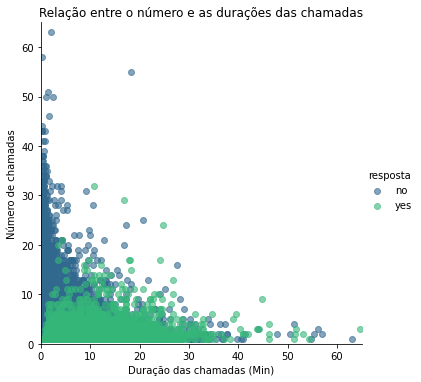

In [55]:
#Plotando a relação entre a duração das ligações, o número de ligações e as respostas recebidas
dur_cam = sns.lmplot(x='duration', y='campaign',data = train_dataset2,
                     hue = 'resposta',
                     fit_reg = False,  palette='viridis',
                     scatter_kws={'alpha':0.6}, height =5)

plt.axis([0,65,0,65])
plt.ylabel('Número de chamadas')
plt.xlabel('Duração das chamadas (Min)')
plt.title('Relação entre o número e as durações das chamadas')

plt.show()

Neste gráfico de dispersão, os clientes que aderiram ao depósito a prazo são indicados como "yes", enquanto os que não o fazem são indicados como "no".

Como podemos ver no gráfico, clientes “sim” e clientes “não” estão formando dois grupos relativamente separados. Em comparação com os clientes “não” ”, os clientes“ sim ”foram contatados por menos vezes e tiveram maior duração da chamada. Mais importante, após cinco ligações, os clientes estão mais propensos a rejeitar o depósito a prazo, a menos que a duração seja alta. A maioria dos clientes “sim” foi abordada por menos de 10 vezes.

Isso sugere que o banco deve resistir a ligar para um cliente mais de cinco vezes, o que pode ser perturbador e aumentar a insatisfação.

In [56]:
# Correlação
train_dataset3_corr = train_dataset3.corr()

<AxesSubplot:>

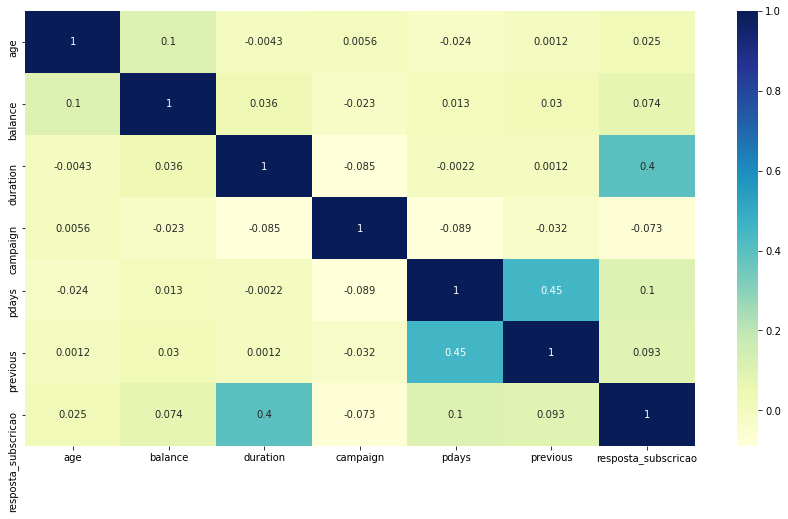

In [57]:
# Plotando a matriz de correlação
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(train_dataset3_corr, annot=True, cmap='YlGnBu')

Claramente, 'resposta_subscricao' tem uma correlação forte com 'duration'. Sua influência no resultado da campanha será investigada mais detalhadamente na parte de machine learning.

In [58]:
# One-hot encoding (transformação de variável categoricas em numéricas)
colunas_cat = train_dataset3[['job', 'marital', 'education', 'contact', 'poutcome', 'loan', 'default', 'housing']]
colunas_cat = pd.get_dummies(colunas_cat)
colunas_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,loan_no,loan_yes,default_no,default_yes,housing_no,housing_yes
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [59]:
colunas_num = train_dataset3[['age', 'duration', 'campaign', 'pdays', 'previous', 'balance', 'resposta_subscricao']]
train_dataset4 = pd.concat([colunas_num, colunas_cat], axis = 1)
train_dataset4.head()

,age,duration,campaign,pdays,previous,balance,resposta_subscricao,job_admin.,job_blue-collar,job_entrepreneur,...,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,loan_no,loan_yes,default_no,default_yes,housing_no,housing_yes
0,58,4.35,1,-1,0,2143,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,44,2.52,1,-1,0,29,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,33,1.27,1,-1,0,2,0,0,0,1,...,0,0,1,0,0,1,1,0,0,1
3,47,1.53,1,-1,0,1506,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
4,33,3.30,1,-1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [60]:
lst = [train_dataset2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [141]:
pd.crosstab(train_dataset2['resposta'],train_dataset2['age_group']).head()

age_group,20.0,30.0,40.0,50.0,60.0
resposta,,,,,
no,4311,15957,10426,7463,1141
yes,911,1876,1036,770,575


In [140]:
count_age_resposta_pct = pd.crosstab(train_dataset2['resposta'],train_dataset2['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_resposta_pct.head()

age_group,20.0,30.0,40.0,50.0,60.0
resposta,,,,,
no,82.554577,89.480177,90.961438,90.647395,66.491841
yes,17.445423,10.519823,9.038562,9.352605,33.508159


In [61]:
count_age_resposta_pct = pd.crosstab(train_dataset2['resposta'],train_dataset2['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_resposta_pct = count_age_resposta_pct.transpose()

In [62]:
count_age_resposta_pct = pd.crosstab(train_dataset2['resposta'],train_dataset2['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_resposta_pct = count_age_resposta_pct.transpose()

In [63]:
age = pd.DataFrame(train_dataset2['age_group'].value_counts())
age['% Contactado'] = age['age_group']*100/age['age_group'].sum()
age['% Subscrição'] = count_age_resposta_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

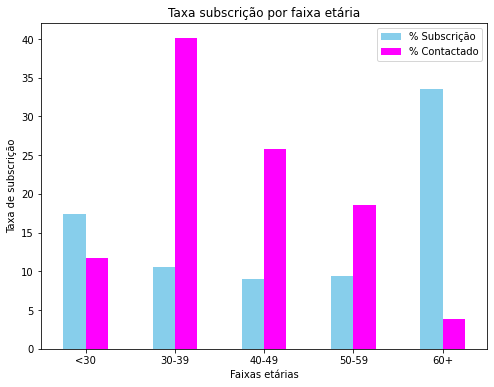

In [64]:
import numpy as np
plot_age = age[['% Subscrição','% Contactado']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('skyblue','magenta'))
plt.xlabel('Faixas etárias')
plt.ylabel('Taxa de subscrição')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Taxa subscrição por faixa etária')
plt.show()

- Focar no mais jovens e os mais velhos, em vez dos de meia-idade

- As barras verticais azuis indicam que os clientes com mais de 60 anos têm a maior taxa de assinatura. Cerca de 18% das subscrições provêm de clientes com idades compreendidas entre os 18 e os 29 anos. Mais de 50% das subscrições provém dos clientes mais jovens e mais velhos.

- Observa-se esse padrão provavelmente porque o principal objetivo de investimento dos idosos é economizar para a aposentadoria, enquanto o grupo de meia-idade tende a ser mais agressivo com o objetivo principal de gerar altos rendimentos de investimento. Os depósitos a prazo, como ferramenta de investimento menos arriscada, são mais preferíveis pelo mais velhos.

- O mais jovem pode não ter dinheiro ou conhecimento profissional suficiente para se envolver em investimentos mais complexos, como ações e fundos mútuos. Os depósitos a prazo fornecem liquidez e geram receitas de juros maiores do que a conta de poupança regular, portanto, os depósitos a prazo são investimentos ideais para os alunos.

- No entanto, as barras verticais roxas mostram que o banco concentrou seus esforços de marketing no grupo de meia-idade, que retornou taxas de assinatura mais baixas do que os grupos mais jovens e mais velhos. 

- Portanto, para tornar a campanha de marketing mais eficaz, o banco deve visar clientes mais jovens e mais velhos no futuro.

In [65]:
lst = [train_dataset2]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'Sem Saldo'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'Saldo Baixo'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'Saldo Médio'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'Saldo Alto'

In [66]:
count_balance_resposta_pct = pd.crosstab(train_dataset2['resposta'],train_dataset2['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_resposta_pct = count_balance_resposta_pct.transpose()

In [67]:
bal = pd.DataFrame(train_dataset2['balance_group'].value_counts())
bal['% Contactado'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscrição'] = count_balance_resposta_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

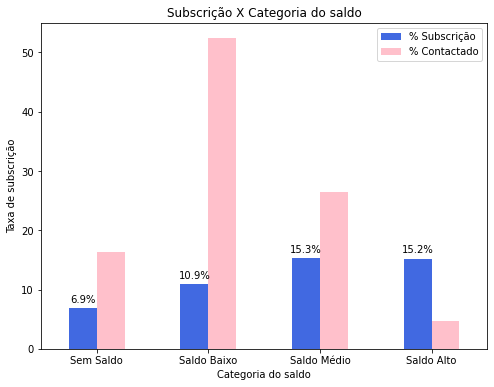

In [68]:
plot_balance = bal[['% Subscrição','% Contactado']].plot(kind = 'bar',
                                               color = ('royalblue','pink'),
                                               figsize = (8,6))

plt.title('Subscrição X Categoria do saldo')
plt.ylabel('Taxa de subscrição')
plt.xlabel('Categoria do saldo')
plt.xticks(rotation = 'horizontal')

# Rótulo na barra de subscrição
for rec, label in zip(plot_balance.patches,
                      bal['% Subscrição'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

O foco deve ser clientes com saldo médio ou alto

Para identificar a tendência mais facilmente, os clientes são classificados em quatro grupos com base em seus saldos:

Sem Saldo: clientes com saldo negativo.
Saldo Baixo: clientes com saldo entre 0 e 1000 euros
Saldo Médio: clientes com saldo entre 1000 e 5000 euros.
Saldo Alto: clientes com saldo superior a 5000 euros.

Sem surpresa, este gráfico de barras indica uma correlação positiva entre os níveis de saldo dos clientes e a taxa de assinatura. Os clientes com saldos negativos retornaram apenas uma taxa de assinatura de 6,9%, enquanto os clientes com saldos médios ou altos tiveram taxas de assinatura significativamente mais altas, quase 15%.

Nota-se que nesta campanha, mais de 50% dos clientes contactados apresentam apenas um nível de saldo baixo. No futuro, o banco deve mudar seu foco de marketing para clientes com saldo alto para garantir mais depósitos a prazo.

In [69]:
count_job_response_pct = pd.crosstab(train_dataset2['resposta'],train_dataset2['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

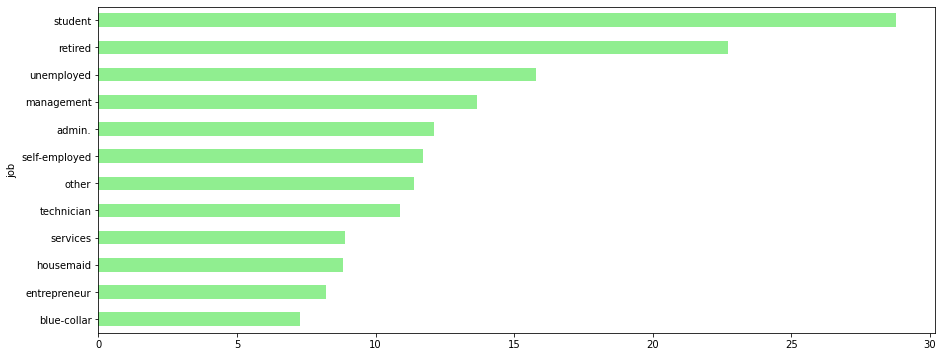

In [142]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (15,6), color = 'lightgreen')

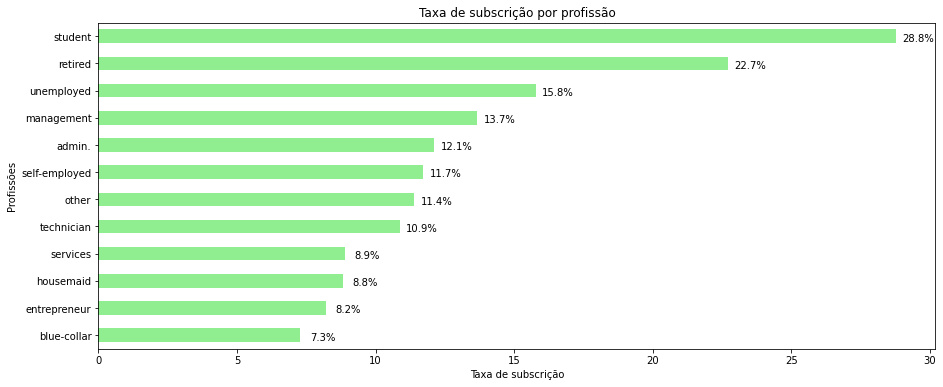

In [70]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (15,6), color = 'lightgreen')
                                                                               
plt.title('Taxa de subscrição por profissão')
plt.xlabel('Taxa de subscrição')
plt.ylabel('Profissões')

# Label each bar
for rec, label in zip(plot_job.patches,count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center',  va='bottom')

Esse gráfico vem reforçar ainda mais os clientes-alvo: Estudantes e Aposentados. É condizente com as descobertas anteriores de taxas de assinatura mais altas entre os mais jovens e os mais velhos (+50%).

## Modelos de predição

Até agora, explorou-se o dataset e foi possível extrair deles alguns insights valiosos. Chegou o momento de construir o modelo de predição. Vamos dividir os dados transformados em duas partes: treino e teste. A ideia por trás da divisão dos dados é que possamos medir a acurácia do modelo com dados não vistos.

Amostras de treinamento: são amostras do conjunto de dados usado para treinar o modelo. Vamos usar 70% dos dados.
Amostras de teste: são amostras usadas para medir a precisão ou desempenho do modelo. Vamos usar 30% dos dados.

#### Observação:

O nosso dataset possui muito mais dados de pessoas que não fizeram o depósito a prazo do que pessoas que fizeram. Nessa situação,tendo um modelo de classificação por exemplo, o resultado desse modelo será enviesado, ou seja ele tende a classificar os novos dados como sendo da classe que possui mais exemplos. Mais para frente lidaremos com esta questão.

In [71]:
#instalando uma biblioteca necessária
!pip install imblearn --user

In [72]:
# Importando as bibliotecas necessárias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

## Nomalização dos dados

É importante normalizar os dados para que os algoritmos entendam que as features possuem unidades comparativas iguais. Por exemplo, temos a feature 'balance' com valores de saldos que tem uma escala muito mais alta do que o resto.

In [73]:
# Separando as features e a variável target
features = train_dataset4.drop("resposta_subscricao", axis = 1) 
target = train_dataset4.resposta_subscricao # variável que queremos prever

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pd.DataFrame(features_scaled)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.615476,0.011427,-0.569440,-0.411348,-0.250872,0.615006,-0.360613,-0.526366,-0.183729,-0.167464,...,-0.261153,-0.348961,0.406173,-0.184903,0.439734,-0.439734,0.13647,-0.13647,-0.889807,0.889807
1,0.294225,-0.415085,-0.569440,-0.411348,-0.250872,-0.613314,-0.360613,-0.526366,-0.183729,-0.167464,...,-0.261153,-0.348961,0.406173,-0.184903,0.439734,-0.439734,0.13647,-0.13647,-0.889807,0.889807
2,-0.743900,-0.706419,-0.569440,-0.411348,-0.250872,-0.629002,-0.360613,-0.526366,5.442790,-0.167464,...,-0.261153,-0.348961,0.406173,-0.184903,-2.274104,2.274104,0.13647,-0.13647,-0.889807,0.889807
3,0.577351,-0.645822,-0.569440,-0.411348,-0.250872,0.244883,-0.360613,1.899818,-0.183729,-0.167464,...,-0.261153,-0.348961,0.406173,-0.184903,0.439734,-0.439734,0.13647,-0.13647,-0.889807,0.889807
4,-0.743900,-0.233293,-0.569440,-0.411348,-0.250872,-0.629583,-0.360613,-0.526366,-0.183729,-0.167464,...,-0.261153,-0.348961,0.406173,-0.184903,0.439734,-0.439734,0.13647,-0.13647,1.123840,-1.123840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44461,0.954851,2.791914,0.075633,-0.411348,-0.250872,-0.150806,-0.360613,-0.526366,-0.183729,-0.167464,...,-0.261153,-0.348961,0.406173,-0.184903,0.439734,-0.439734,0.13647,-0.13647,1.123840,-1.123840
44462,2.842352,0.768894,-0.246903,-0.411348,-0.250872,0.374455,-0.360613,-0.526366,-0.183729,-0.167464,...,-0.261153,-0.348961,0.406173,-0.184903,0.439734,-0.439734,0.13647,-0.13647,1.123840,-1.123840
44463,2.936727,3.374582,0.720705,1.433727,1.047763,2.690483,-0.360613,-0.526366,-0.183729,-0.167464,...,-0.261153,-0.348961,-2.462003,5.408233,0.439734,-0.439734,0.13647,-0.13647,1.123840,-1.123840
44464,1.521101,0.971662,0.398169,-0.411348,-0.250872,-0.242029,-0.360613,1.899818,-0.183729,-0.167464,...,3.829172,-0.348961,0.406173,-0.184903,0.439734,-0.439734,0.13647,-0.13647,1.123840,-1.123840


In [75]:
# Separando dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(features_scaled, target, test_size = 0.3, random_state = 42)

## Modelo Logistic Regression

In [76]:
# Treinando o algoritmo
lr = LogisticRegression(random_state=42)
model1 = lr.fit(x_treino, y_treino)

In [77]:
# Predizendo o resultado
y_pred = model1.predict(x_teste)

In [78]:
# Comparando o resultado predito com o resultado real e checando a acurácia do modelo
accuracy_score(y_teste, y_pred).round(2)

0.9

A acurácia é uma das maneiras de verificar a qualidade do modelo.
Nossa base é desbalanceada, então a acurácia nesse caso não é a melhor métrica de avaliação do modelo.

## Métricas de qualidade

Devemos saber como medir a qualidade dos nossos modelos. No caso de modelos supervisionados, temos alguns métodos de validação que são bem conhecidos.

### Matriz de confusão
A Matriz de Confusão é uma forma de mostrar mais claramente quantos são:

Verdadeiros Positivos (quem subscreveu e o modelo disse que subscreveu)
Falsos Positivos (quem não subscreveu e o modelo disse que subscreveu)
Verdadeiros Negativos (quem não subscreveu e o modelo disse que não subscreveu)
Falsos Negativos (quem subscreveu e o modelo disse que não subscreveu)

![tt](https://sebastianraschka.com/images/faq/multiclass-metric/conf_mat.png)

In [79]:
matriz_confusao = pd.crosstab(y_teste, y_pred, rownames=['Real'], colnames=['Predito'], margins=True) # confusion_matrix
matriz_confusao

Predito,0,1,All
Real,,,
0,11536,293,11829
1,1031,480,1511
All,12567,773,13340


A matriz de confusão nos mostra o número exato de registros classificados por classe.
Temos 1031 registos classificados como sendo da classe 0 (não subscreveu) quando na verdade eram da classe 1 (subscreveu).

###  Precision e recall

A partir da matriz de confusão algumas taxas podem ser calculadas.

Vamos visualizar de outra maneira os dados sendo testados:

![pr](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o.png/262px-Precis%C3%A3o_e_revoca%C3%A7%C3%A3o.png)

###### PRECISION

*Precision* representa quanto dos elementos julgados como 'Subscreveu', de fato são 'Subscreveu'. 
Mede a taxa de acerto do classificador dentre os valores <span class="atencao">estimados</span>.

###### RECALL

*Recall* representa quantos dos reais 'Subscreveu' foram de fato classificados como 'Subscreveu'.
Mede a taxa de acerto do classificador dentre os valores <span class="atencao">reais</span>.

In [80]:
from sklearn import metrics
print(metrics.classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11829
           1       0.62      0.32      0.42      1511

    accuracy                           0.90     13340
   macro avg       0.77      0.65      0.68     13340
weighted avg       0.88      0.90      0.89     13340



Nota-se que o recall (número de acertos) para a classe 0 é muito alta, por outro lado é bem baixa para a classe 1.

Isso só reforça o que já sabemos, nosso modelo está enviesado, ele aprendeu mais sobre a classe que tinha uma maior quantidade de exemplos.

## Balanceamento dos dados

Vamos aplicar o SMOTE (Synthetic Minority Over-sampling Technique). Esse algoritmo gera dados sintéticos da classe minoritária.

In [81]:
# Visualizando a quantidade de dados por classe
np.bincount(target)

array([39298,  5168], dtype=int64)

In [82]:
smt = SMOTE(random_state=42)

Essa técnica possui o parâmetro sampling_strategy que nos permiti definir qual a porcentagem de dados sintéticos que queremos.
Se definirmos 0.5 por exemplo, ele vai gerar dados sintéticos até 50% da classe majoritária. Mas a título de exemplo será usada o método padrão.

In [83]:
X, y = smt.fit_resample(features_scaled, target)

In [84]:
np.bincount(y)

array([39298, 39298], dtype=int64)

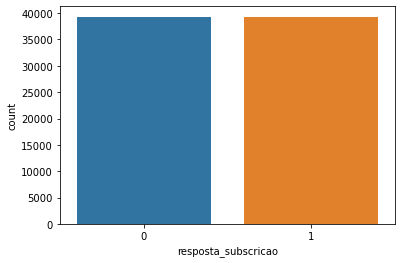

In [85]:
ax = sns.countplot(x=y)

In [86]:
# Separando dados de treino e teste do dataset balanceado
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [87]:
# Treinando o algoritmo
model_bal = lr.fit(X_train, y_train)

In [88]:
# Predizendo o resultado após balanceamento
y_pred_novo = model_bal.predict(X_test)

In [89]:
# Comparando o resultado predito com o resultado real e checando a acurácia do modelo
accuracy_score(y_test, y_pred_novo).round(2)

0.83

In [90]:
print (classification_report(y_test, y_pred_novo))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     11808
           1       0.83      0.82      0.82     11771

    accuracy                           0.83     23579
   macro avg       0.83      0.83      0.83     23579
weighted avg       0.83      0.83      0.83     23579



 Temos um número de acertos parecido para as duas classes

In [91]:
#matriz de confusão
print (pd.crosstab(y_test, y_pred_novo, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0      1    All
Real                        
0         9882   1926  11808
1         2157   9614  11771
All      12039  11540  23579


Podemos ver agora que a taxa de acerto para classe 1 (subscreveu) aumentou. Agora temos um bom modelo.

## Modelo Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

In [94]:
# Treinando o algoritmo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [95]:
# Predizendo o resultado
predict = clf.predict(X_test)
pd.DataFrame(predict)

,0
0,1
1,0
2,0
3,0
4,1
...,...
23574,1
23575,0
23576,1
23577,1


In [96]:
# Comparando o resultado predito com o resultado real e checando a acurácia do modelo
accuracy_score(y_test,predict).round(2)

0.81

In [97]:
print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81     11808
           1       0.80      0.83      0.81     11771

    accuracy                           0.81     23579
   macro avg       0.81      0.81      0.81     23579
weighted avg       0.81      0.81      0.81     23579



In [98]:
#matriz de confusão
print (pd.crosstab(y_test, predict, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0      1    All
Real                        
0         9370   2438  11808
1         2022   9749  11771
All      11392  12187  23579


## Features importance

In [99]:
from sklearn.feature_selection import RFE
seletor = RFE(lr, n_features_to_select=6, step=1)
features_selected = seletor.fit(X_train, y_train)
features_selected

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=6)

In [100]:
#  Combinação de features de acordo com nossos dados. Aonde está True significa que ele escolheu aquela feature.
features_selected.support_

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
        True])

In [101]:
#Ranking de quão boas são as features 
features_selected.ranking_

array([32,  1,  1, 18,  7, 13, 11, 14, 20, 23, 30, 22,  8, 19, 21, 10, 27,
       31, 29, 25, 12, 26,  3, 17,  9,  4,  1,  5, 16, 15,  1,  6,  1, 28,
       24,  2,  1])

In [102]:
features.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'balance',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_other', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_other', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_other',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'loan_no', 'loan_yes', 'default_no', 'default_yes',
       'housing_no', 'housing_yes'],
      dtype='object')